# **Climate Portfolio Assignment:** It's a scorcher in Chicago


## Background
**Purpose:** The purpose of this notebook is to download climate data 
from the NOAA Global Historic Climatology Network and visualize trends.

**Data:** This notebook downloads daily maximum temperature (in °F) 
between Feb 29 1928 and Sept 28 2025.

**Location:** These data come from a NOAA weather station 
(ID: USC00111577) near Midway International Airport in 
Chicago, IL (41.73727°, -87.77734°).

## Outline
0. Import libraries and define path variables
1. Download NOAA climate data from NCEI
2. Clean and format downloaded data
3. Data visualization
4. OLS Linear Regression
5. Conclusions

## Step 0: Import Packages and Set Data Directory

In [16]:
# Import required packages
import earthpy
import pandas as pd
import os
# Save maps and plots to files
import holoviews as hv
# Create interactive maps and plots
import hvplot.pandas
# Packages for trendline + plotting
import numpy as np
import matplotlib.pyplot as plt
# Common statistical plots for tabular data
import seaborn as sns
# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression

# Define data directory
data_dir = "/workspaces/data/"
print("Data directory set to:", data_dir)

Data directory set to: /workspaces/data/


## Step 1: Download climate data from NOAA NCEI

**DATA DESCRIPTION AND CITATION**
The Global Historic Climatology Network is a NOAA data product consisting of daily weather observations from ~25,000 of weather stations distributed across the globe. These weather stations are managed by the World Meteorological Organization, Cooperative, and CoCoRaHS networks.

**Citation**
Menne, Matthew J., Imke Durre, Bryant Korzeniewski, Shelley McNeill, Kristy Thomas, Xungang Yin, Steven Anthony, Ron Ray, Russell S. Vose, Byron E.Gleason, and Tamara G. Houston (2012): Global Historical Climatology Network - Daily (GHCN-Daily), Version 3. [indicate subset used]. NOAA National Climatic Data Center. doi:10.7289/V5D21VHZ [Sept 24 2025].


In [17]:
# Create API call
midwayNCEI = ('https://www.ncei.noaa.gov/access/services/data/v1?'
'dataset=daily-summaries'
'&dataTypes=TMAX'
'&stations=USC00111577'
'&startDate=1928-02-29'
'&endDate=2025-09-28'
'&units=standard')
midwayNCEI

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=TMAX&stations=USC00111577&startDate=1928-02-29&endDate=2025-09-28&units=standard'

In [18]:
# Download using API
climate_df = pd.read_csv(
    midwayNCEI,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN']
)

# Check that the download worked
climate_df.head(n=10)

,STATION,TMAX
DATE,,
1928-02-29,USC00111577,39.0
1928-03-01,USC00111577,36.0
1928-03-02,USC00111577,42.0
1928-03-03,USC00111577,37.0
1928-03-04,USC00111577,41.0
1928-03-05,USC00111577,28.0
1928-03-06,USC00111577,38.0
1928-03-07,USC00111577,43.0
1928-03-08,USC00111577,42.0


In [19]:
# Save the climate data
output = os.path.join(data_dir,'chicagoILtobs.csv')
climate_df.to_csv(output)

## Step 2: Clean downloaded data
- Remove station ID (they're all the same)
- Rename columns
- Add in degrees C
- Drop NAs

In [20]:
# Keep only the index column (date) and the temperature average (TAVG) columns
climate_df = climate_df[['TMAX']]
# print the cleaned dataframe
climate_df

,TMAX
DATE,
1928-02-29,39.0
1928-03-01,36.0
1928-03-02,42.0
1928-03-03,37.0
1928-03-04,41.0
...,...
2025-09-23,79.0
2025-09-24,75.0
2025-09-25,77.0


In [21]:
# Rename degrees F column
climate_df_units = climate_df.rename(columns={
    'TMAX': 'TMAX_F',
})

climate_df_units

,TMAX_F
DATE,
1928-02-29,39.0
1928-03-01,36.0
1928-03-02,42.0
1928-03-03,37.0
1928-03-04,41.0
...,...
2025-09-23,79.0
2025-09-24,75.0
2025-09-25,77.0


In [22]:
# Convert F to C
climate_df_units['TMAX_C'] = ((climate_df_units['TMAX_F']-32)*5/9)
climate_df_units

,TMAX_F,TMAX_C
DATE,,
1928-02-29,39.0,3.888889
1928-03-01,36.0,2.222222
1928-03-02,42.0,5.555556
1928-03-03,37.0,2.777778
1928-03-04,41.0,5.000000
...,...,...
2025-09-23,79.0,26.111111
2025-09-24,75.0,23.888889
2025-09-25,77.0,25.000000


In [23]:
# Drop NAs (required for trendline calculation)
climate_df_units = climate_df_units.dropna()

## Step 3: Visualize data
- All data + trendline
- Yearly average temp max + trendline
- Interactive yearly average temp max

### All data

Trendline:  
0.0001029 x + 13.3


/tmp/ipykernel_16980/3221889449.py:32: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax.plot(climate_df_units.index,


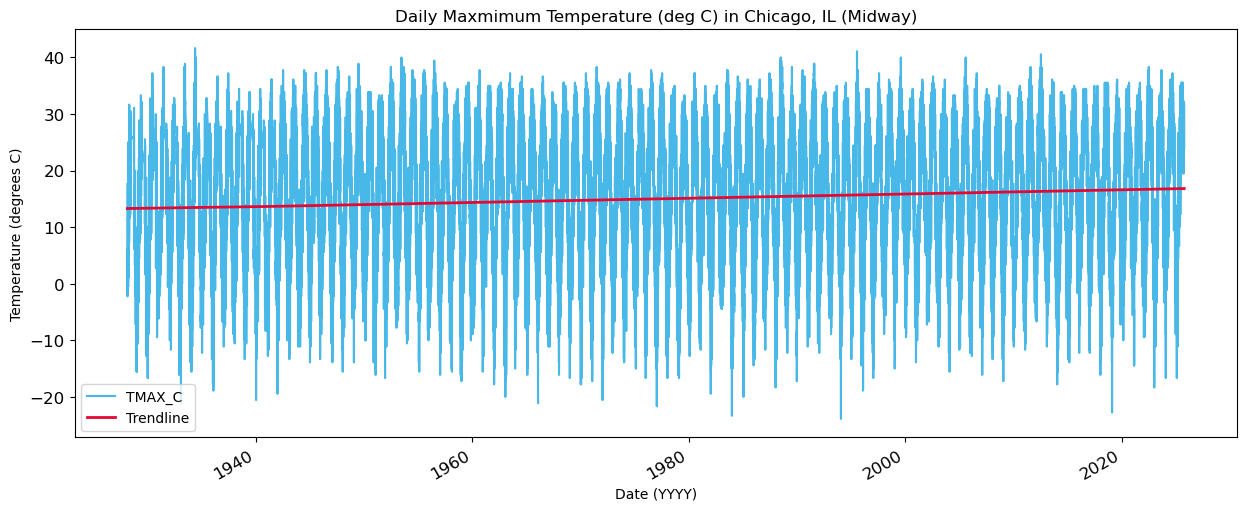

In [24]:
# Initialize plot - we're stacking the temp data and trendline
fig, ax = plt.subplots(figsize=(15,6))

# Plot temp data
climate_df_units.plot(
    ax=ax,
    y='TMAX_C',
    title='Daily Maxmimum Temperature (deg C) in Chicago, IL (Midway)',
    xlabel='Date (YYYY)',
    ylabel='Temperature (degrees C)',
    # legend
    legend=False,
    # fig size
    figsize=(15,6),
    # font
    fontsize=12,
    # color
    color='#47B8E7'
    )


# Trendline regression
x = np.arange(len(climate_df_units))
y = climate_df_units['TMAX_C'].values

# straight trend line (first degree polynomial)
coeffs = np.polyfit(x,y,1)
trendline = np.poly1d(coeffs)
print("Trendline:", trendline)

# Plot with trendline
ax.plot(climate_df_units.index, 
        trendline(x), 
        color='#E50832', 
        linewidth=2,
        label='Trendline')
ax.legend()
plt.show()

### Yearly averages

In [25]:
# Resample yearly averages
ann_climate_df = (
    climate_df_units
    # Define 'yearly' data spacing
    .resample('YS')
    # Calculate mean across yearly spacing (yearly mean)
    .mean()
)
ann_climate_df

,TMAX_F,TMAX_C
DATE,,
1928-01-01,55.452381,13.029101
1929-01-01,48.947368,9.415205
1930-01-01,52.081481,11.156379
1931-01-01,54.882784,12.712658
1932-01-01,52.000000,11.111111
...,...,...
2021-01-01,62.336986,16.853881
2022-01-01,61.630137,16.461187
2023-01-01,62.663014,17.035008


Trendline:  
0.04103 x + 12.94


/tmp/ipykernel_16980/121146712.py:33: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax_an.plot(ann_climate_df.index,


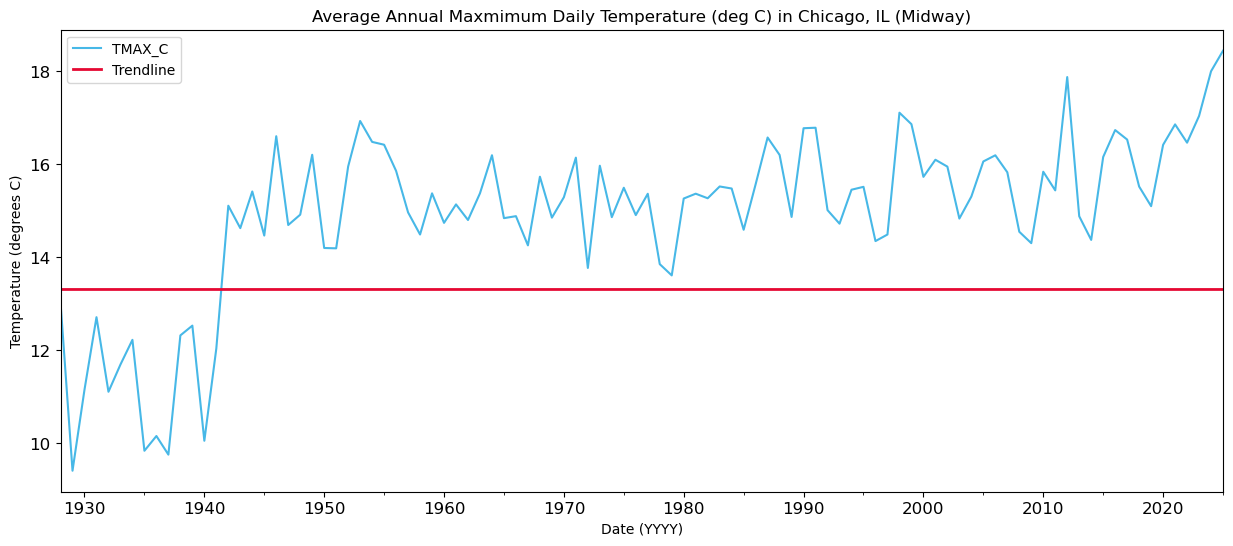

In [26]:
# Intialize plot
fig_an, ax_an = plt.subplots(figsize=(15,6))

# Plot yearly aggregated data
# Note: switched to bar plot for better viewing
ann_climate_df.plot(
    #kind='bar', # can comment out this line for a line graph
    ax=ax_an,
    y='TMAX_C',
    title='Average Annual Maxmimum Daily Temperature (deg C) in Chicago, IL (Midway)',
    xlabel='Date (YYYY)',
    ylabel='Temperature (degrees C)',
    # legend
    legend=False,
    # fig size
    figsize=(15,6),
    # font
    fontsize=12,
    # color
    color='#47B8E7'
)

# Trendline regression
x_an = np.arange(len(ann_climate_df))
y_an = ann_climate_df['TMAX_C'].values

# straight trend line (first degree polynomial)
coeffs_an = np.polyfit(x_an,y_an,1)
trendline_an = np.poly1d(coeffs_an)
print("Trendline:", trendline_an)

# Plot with trendline
ax_an.plot(ann_climate_df.index, 
        trendline(x_an), 
        color='#E50832', 
        linewidth=2,
        label='Trendline')
ax_an.legend()
plt.show()

### Interactive Annual Plot

In [27]:
# Plot yearly aggregated data
ann_plot_hv = ann_climate_df.hvplot(
    #kind='bar', # can comment out this line for a line graph
    #ax=ax_an,
    y='TMAX_C',
    title='Average Annual Maxmimum Daily Temperature (deg C) in Chicago, IL (Midway)',
    xlabel='Date (YYYY)',
    ylabel='Temperature (degrees C)',
    # legend
    legend=False,
    # fig size
    #figsize=(15,6),
    # font
    fontsize=12,
    # color
    color='#47B8E7'
)
ann_plot_hv

:Curve   [DATE]   (TMAX_C)

In [28]:
# Save interactive plot
hv.save(ann_plot_hv, 'chicago_annPlot_hv.html')

## Step 4: Linear Ordinary Least Squares (OLS) Regression
#### Using package *sklearn*

### Assumptions of OLS
**Random error**  
Variation in temperature can be caused by many things beyond global
climate change. For example, temperatures often vary with patterns of
ocean surface temperatures (*teleconnections*), the most famous of which
are El Niño and La Niña. By using a linear OLS regression, we’re
assuming that all the variation in temperature except for climate change
is random.

**Normally distributed error**
If you have taken a statistics class, you probably learned a lot about
the normal, or Gaussian distribution. For right now, what you need to
know is that OLS regression is useful for identifying trends in average
temperature, but wouldn’t be appropriate for looking at trends in daily
precipitation (because most days have zero precipitation), or at maximum
or minimum annual temperatures (because these are extreme values, and
the normal distribution tends to underestimate the likelihood of large
events).

**Linearity**  
We’re assuming that temperatures are increasing or decreasing at a
constant rate over time. We wouldn’t be able to look at rates that
change over time. For example, many locations in the Arctic remained the
same temperature for much longer than the rest of the world, because ice
melt was absorbing all the extra heat. Linear OLS regression wouldn’t be
able to identify when the temperature rise began on its own.

**Stationarity**  
We’re assuming that variation in temperature caused by things *other*
than global climate change (e.g. the random error) behaves the same over
time. For example, the linear OLS regression can’t take increased
variability from year to year into account, which is a common effect of
climate change. We often see “global weirding”, or more extreme head
*and* cold, in addition to overall increases. You can observe this most
easily by looking at your daily data again. Does it seem to be fanning
in or out over time?

### Initial Model Fitting

In [29]:
# Fit OLS to data
# Assuming df is your DataFrame with 'DATE' as the index and 'TMAX_C' as the column
df = ann_climate_df.reset_index()
# convert year to an integer
df['DATE'] = pd.to_datetime(df['DATE']).dt.year.astype(int)

# Drop NA rows
df = df.dropna(subset=['TMAX_C'])

# Reshape 'DATE' column to be a 2D array for scikit-learn
date = df[['DATE']].values
temp = df['TMAX_C'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(date, temp)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: 0.04103195634639195
Intercept: -66.16935727842207


### Plot OLS Line

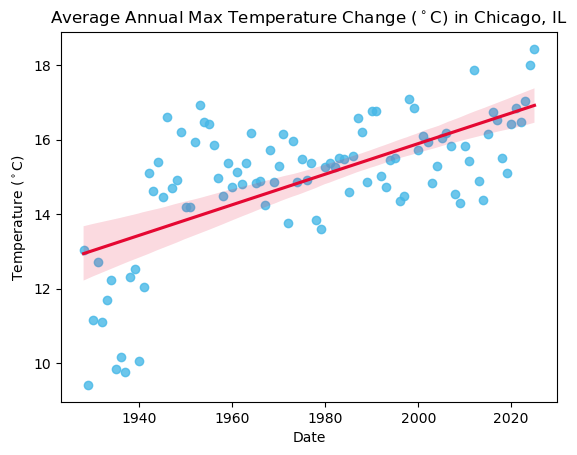

In [36]:
# Plot annual average temperature with a trend line

# Initialize
fig, ax = plt.subplots()

# Set axes 
sns.regplot(
    x=date, 
    y=temp,
    scatter_kws={'color':'#47B8E7'},
    line_kws={'color':'#E50832'}
)

# Set plot labels
ax.set(
    title='Average Annual Max Temperature Change ($^\circ$C) in Chicago, IL',
    xlabel='Date',
    ylabel='Temperature ($^\circ$C)'
)

# Display the plot without extra text
plt.show()

# Save figure
fig.savefig('chicago_maxtemp.png')

## Step 5: Conclusions

### **Take home message:** At this weather station in Chicago, IL, the daily maximum temperature is increasing 0.04°C per year between 1928 and 2025.

### **Caveat:** We did not verify the assumptions of OLS. Just by looking at the scatter plot, there appears to be a **bimodal distribution** happening: **1928-1941** and **1941-2025**. We should verify that the number of data points and time of observation is the same for these two time periods. It might also be worh truncating the data at 1941 for a cleaner result. 